# Unit 08 - Lecture 01 - Preprocessing Data for Supervise Learning

CAI 4823: Artificial Intelligence for Industrial Engineers<br>
University of Central Florida
 

## Notebook Learning Objectives
After studying this notebook students should be able to:
- Undertand how to preprocess data to be used in Scikit-learn
- Undertand how the data from Lending Club example was preprocess
- Uses datasets: "LoanStats3a.csv"

Download data from "https://www.lendingclub.com/info/download-data.action" years 2007-2011.

# 1. Load the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###
pd.set_option('mode.chained_assignment', None) # to prevent warning

filename = '../Data/LoanStats3a.csv' 
df = pd.read_csv(filename, low_memory=False, skiprows=1) 
#low_memory=False:: Do not internally process the file in chunks, resulting in higher memory use but no mixed types
#skiprows=1::  skip 1 (0-indexed) line at the start of the file.

#print the names of all columns in dataset
col_names = df.columns.tolist()
print (col_names)
print ('Number of attributes: ' + str(len(col_names)))

df

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_i

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,NaN,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,NaN,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42535,NaN,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Define project Goal (learning task), Features (X array) and Target (Y vector)

## Goal: 
Based on the information filled by a customer asking for a loan, we want to predict if the loan will be approved or not.

## Feature Selection (X):
We are using data from the Lending Club. Not all information is relevant to our interest, thus we detail in the following the fields we will base our prediction on:

+ annual_inc	The annual income provided by the borrower during registration.
+ delinq_2yrs	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
+ dti (debt to income)	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
+ earliest_cr_line	The month the borrower's earliest reported credit line was opened
+ emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
+ home_ownership	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
+ installment	The monthly payment owed by the borrower if the loan originates.
+ int_rate	Interest Rate on the loan
+ is_inc_v	Indicates if income was verified by LC, not verified, or if the income source was verified
+ last_fico_range_high	The last upper boundary of range the borrower’s FICO belongs to pulled. **Note:** t FICO Score is a type of credit score developed by Fair Isaac Corporation (FICO). It’s a three-digit number (usually between 300 and 850) that summarizes an individual’s credit history and predicts their likelihood of repaying debts on time.
+ last_fico_range_low	The last lower boundary of range the borrower’s FICO belongs to pulled.
+ fico_range_high	The upper boundary of range the borrower’s FICO belongs to.
+ fico_range_low	The lower boundary of range the borrower’s FICO belongs to.
+ mths_since_last_delinq	The number of months since the borrower's last delinquency.
+ mths_since_last_major_derog	Months since most recent 90-day or worse rating
+ open_acc	The number of open credit lines in the borrower's credit file.
+ term	The number of payments on the loan. Values are in months and can be either 36 or 60.
+ total_acc	The total number of credit lines currently in the borrower's credit file
+ loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

## Target (y)

+ We want to predict successful, accepted loans. We need a definition of success. A loan applicaiton is successful if the funded amount by investors (funded_amnt_inv) is close to the loan amount (loan_amnt) requested. In this sense we could put a threshold in which the acceptance is based on
  
$${Rejected Loan} = \frac{loan - funded}{loan}\geq 0.05$$

We are defining a failed loan if the loan was unfunded for more than 5%. A successful loan is when it is funded by at least 95% of the requested amount. Considering the accepted loans which ones are successful and can we derive some rules for success?


# 3. Select Features columns (X)
Let us keep only the useful columns - **feature selection**. We do this by <br>
  1. hypotesizing what column could be good predictors of "rejected vs accepted loans" and
  2. observing what columns have less amount of ```NaN```.

In [13]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,NaN,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,NaN,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42535,NaN,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
keep_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'total_acc']
df = df[keep_cols]

In [15]:
col_names = df.columns.tolist()
print (col_names)
print ('Number of attributes: ' + str(len(col_names)))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'total_acc']
Number of attributes: 13


In [16]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,10.00,NaN,NaN,NaN
42534,6500.0,6500.0,0.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,4.00,NaN,NaN,NaN
42535,5000.0,5000.0,0.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,8.81,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Create target column (y)

We need a new column for our target values y. The y column will contain a "1" if the loan failed (customer did not received at least 95% of the money they requested) and it will be a "0" if the load succeded.

## Create a new column: targets = (loan - funded)/loan 

<class 'numpy.ndarray'> [5000. 2500. 2400. ... 5000.   nan   nan]
0        0.005000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
42533    0.910891
42534    1.000000
42535    1.000000
42536         NaN
42537         NaN
Name: targets, Length: 42538, dtype: float64
wrk_records= (array([    0,     1,     2, ..., 42533, 42534, 42535]),) 42535
wrk_records type= <class 'tuple'>


(array([33500.,  1950.,   814.,   580.,   367.,   277.,   292.,   284.,
          262.,   322.,   391.,   503.,   245.,   161.,   128.,   130.,
          114.,   131.,   135.,   121.,   102.,   149.,   144.,   146.,
          158.,   169.,   213.,   166.,   184.,   397.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

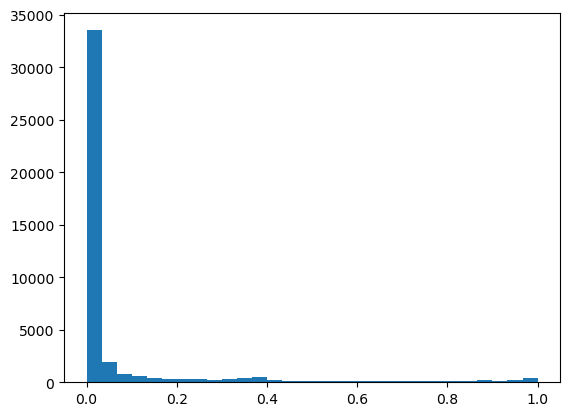

In [18]:
loan = df['loan_amnt'].to_numpy()
#loan = df['loan_amnt'].values
print(type(loan),loan)
#funded = df['funded_amnt_inv'].values
funded = df['funded_amnt_inv'].to_numpy()
targets = np.abs(loan-funded)/loan
#print(type(targets))

df['targets'] = targets
print(df['targets'])

wrk_records = np.where(~np.isnan(targets)) 
#note that where is returning a 2D array with second component empty [ [array], ]
print("wrk_records=",wrk_records, len(wrk_records[0]))
print("wrk_records type=", type(wrk_records))

plt.hist(targets[wrk_records],bins=30)

## How many successful vs. failed loans do we have?

In [20]:
y1 = targets[wrk_records]>=0.05 #True = failed loan, >5% loan remain unfunded
print("y1=",y1)
print ('Failed Loans count: ' + str(np.sum(y1)))
print ('Approved Loans count: ' + str(np.sum(1-y1)))

g = [True, False, True]
l = len(g)
print("There are ", np.sum(g), " TRUEs out of total ", l, " elements")

y1= [False False False ...  True  True  True]
Failed Loans count: 7896
Approved Loans count: 34639
There are  2  TRUEs out of total  3  elements


([<matplotlib.patches.Wedge at 0x149c73800>,
 [Text(-0.918180753659517, 0.6057591135172803, 'Almost or fully funded'),
  Text(0.9181806969442514, -0.6057591994835645, 'Not fully funded')],
 [Text(-0.5008258656324638, 0.3304140619185165, '81.44'),
  Text(0.5008258346968644, -0.33041410880921696, '18.56')])

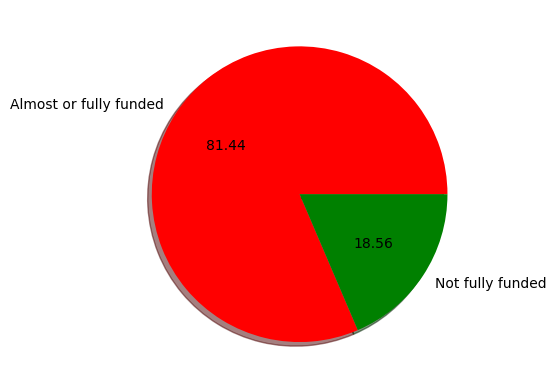

In [21]:

plt.pie([len(y1)-np.sum(y1),np.sum(y1)],labels=['Almost or fully funded','Not fully funded'],colors=['r','g'],shadow=True,autopct ='%.2f' )


# 4. Check features, all features need to be numbers!

In [23]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0,0.005000
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0,0.000000
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0,0.000000
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0,0.000000
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,10.00,NaN,NaN,NaN,0.910891
42534,6500.0,6500.0,0.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,4.00,NaN,NaN,NaN,1.000000
42535,5000.0,5000.0,0.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,8.81,NaN,NaN,NaN,1.000000
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observe the different issues in term, int_rate, emp_length, home_ownership. 

Interest rate is a string, so we may convert it to float by removing the percentage character and converting to float point values. With respect to term and emp_length we could use several strategies: we can vectorize the different results. But note that there is an order relationship. In this particular case categorical values can be directly translated to numbers that represent that order. Finally, house_ownership will be vectorized into as many features as values in the categorical variable.

## Clean <code>int_rate</code> column

In [26]:
print ('Values of the interest rate: ' + str(df['int_rate'].unique()))

Values of the interest rate: [' 10.65%' ' 15.27%' ' 15.96%' ' 13.49%' ' 12.69%' '  7.90%' ' 18.64%'
 ' 21.28%' ' 14.65%' '  9.91%' ' 16.29%' '  6.03%' ' 11.71%' ' 12.42%'
 ' 14.27%' ' 16.77%' '  7.51%' '  8.90%' ' 18.25%' '  6.62%' ' 19.91%'
 ' 17.27%' ' 17.58%' ' 21.67%' ' 19.42%' ' 22.06%' ' 20.89%' ' 20.30%'
 ' 23.91%' ' 19.03%' ' 23.52%' ' 23.13%' ' 22.74%' ' 22.35%' ' 24.11%'
 '  6.00%' ' 22.11%' '  7.49%' ' 11.99%' '  5.99%' ' 10.99%' '  9.99%'
 ' 18.79%' ' 11.49%' '  8.49%' ' 15.99%' ' 16.49%' '  6.99%' ' 12.99%'
 ' 15.23%' ' 14.79%' '  5.42%' ' 10.59%' ' 17.49%' ' 15.62%' ' 21.36%'
 ' 19.29%' ' 13.99%' ' 18.39%' ' 16.89%' ' 17.99%' ' 20.62%' ' 20.99%'
 ' 22.85%' ' 19.69%' ' 20.25%' ' 23.22%' ' 21.74%' ' 22.48%' ' 23.59%'
 ' 12.62%' ' 18.07%' ' 11.63%' '  7.91%' '  7.42%' ' 11.14%' ' 20.20%'
 ' 12.12%' ' 19.39%' ' 16.11%' ' 17.54%' ' 22.64%' ' 13.84%' ' 16.59%'
 ' 17.19%' ' 12.87%' ' 20.69%' '  9.67%' ' 21.82%' ' 19.79%' ' 18.49%'
 ' 22.94%' ' 24.59%' ' 24.40%' ' 21.48%' ' 14.82

In [27]:
def clear_percent (row):
    try:
        d = float(row['int_rate'][:-1])/100. #[:-1] select string but not last member = %
    except:
        d = None
    return d

df['int_rate_clean'] = df.apply (lambda row: clear_percent(row),axis=1)
print ('Values of the interest rate clean: ' + str(df['int_rate_clean'].unique()))

Values of the interest rate clean: [0.1065 0.1527 0.1596 0.1349 0.1269 0.079  0.1864 0.2128 0.1465 0.0991
 0.1629 0.0603 0.1171 0.1242 0.1427 0.1677 0.0751 0.089  0.1825 0.0662
 0.1991 0.1727 0.1758 0.2167 0.1942 0.2206 0.2089 0.203  0.2391 0.1903
 0.2352 0.2313 0.2274 0.2235 0.2411 0.06   0.2211 0.0749 0.1199 0.0599
 0.1099 0.0999 0.1879 0.1149 0.0849 0.1599 0.1649 0.0699 0.1299 0.1523
 0.1479 0.0542 0.1059 0.1749 0.1562 0.2136 0.1929 0.1399 0.1839 0.1689
 0.1799 0.2062 0.2099 0.2285 0.1969 0.2025 0.2322 0.2174 0.2248 0.2359
 0.1262 0.1807 0.1163 0.0791 0.0742 0.1114 0.202  0.1212 0.1939 0.1611
 0.1754 0.2264 0.1384 0.1659 0.1719 0.1287 0.2069 0.0967 0.2182 0.1979
 0.1849 0.2294 0.2459 0.244  0.2148 0.1482 0.1417 0.0729 0.1788 0.2011
 0.1602 0.1751 0.1343 0.1491 0.1306 0.1528 0.1565 0.1714 0.1111 0.1037
 0.164  0.0766 0.1    0.1862 0.1074 0.0579 0.0692 0.0963 0.1454 0.1268
 0.1936 0.138  0.1899 0.2159 0.2085 0.2122 0.1974 0.2048 0.0691 0.1223
 0.1261 0.1036 0.0617 0.0654 0.0925 0.1669

## Clean <code>term</code> column

In [29]:
print ('Values of the variable term: ' + str(df['term'].unique()))

Values of the variable term: [' 36 months' ' 60 months' nan]


In [30]:
def clear_term (row):
    try:
        if row['term']==' 36 months':
            d = 1
        else:
            if row['term']==' 60 months':
                d = 2
            else:
                if np.isnan(row['term']):
                    print('found nan')
                    d = None
                else:
                    print ('WRONG')
                    print (row['term'])
    except:
        print ('EXCEPT')
        d = None
    return d

df['term_clean'] = df.apply (lambda row: clear_term(row),axis=1)
print ('Values of the variable term clean: ' + str(df['term_clean'].unique()))    

found nan
found nan
found nan
Values of the variable term clean: [ 1.  2. nan]


## Clean column <code>emp_length</code>

In [32]:
print ('Values for employment length: ' + str(df['emp_length'].unique()))

Values for employment length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [33]:
#We use dictionary mapping as a switch 
def clean_emp_length(argument):
    switcher = {
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
        '< 1 year': 0,
        'n/a':None,
    }
    try:
        d = switcher[argument['emp_length']]    
    except:
        d = None
    return d

df['emp_length_clean'] = df.apply (lambda row: clean_emp_length(row),axis=1)
print ('Values for employment length clean: ' + str(df['emp_length_clean'].unique()))

Values for employment length clean: [10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]


In [34]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,int_rate_clean,term_clean,emp_length_clean
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0,0.005,0.1065,1.0,10.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0,0.000,0.1527,2.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0,0.000,0.1596,1.0,10.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0,0.000,0.1349,1.0,10.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0,0.000,0.1269,2.0,1.0


## Clean <code>home_ownership</code> column 

```DictVectorizer``` Transforms lists of feature-value mappings to vectors.

This transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays or scipy.sparse matrices for use with scikit-learn estimators.

When feature values are strings, this transformer will do a binary one-hot (aka one-of-K) coding: one boolean-valued feature is constructed for each of the possible string values that the feature can take on. For instance, a feature “f” that can take on the values “ham” and “spam” will become two features in the output, one signifying “f=ham”, the other “f=spam”.

In [37]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', nan], dtype=object)

In [38]:
from sklearn.feature_extraction import DictVectorizer

comb_dict = df[['home_ownership']].to_dict(orient='records')
print("--------->comb_dict: ", type(comb_dict),'\n',comb_dict[:10]) #print first 10
vec = DictVectorizer()
home_raw = vec.fit_transform(comb_dict).toarray() #transform data
print("--------->names: ", vec.get_feature_names_out()) #get new column names
print("--------->home_raw: ",type(home_raw),'\n',home_raw[:10])
home = 2*vec.fit_transform(comb_dict).toarray()-1 #transform from {0,1} to {-1,+1}
print("--------->home: ",type(home),'\n',home[:10])

--------->comb_dict:  <class 'list'> 
 [{'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'RENT'}, {'home_ownership': 'OWN'}, {'home_ownership': 'RENT'}]
--------->names:  ['home_ownership' 'home_ownership=MORTGAGE' 'home_ownership=NONE'
 'home_ownership=OTHER' 'home_ownership=OWN' 'home_ownership=RENT']
--------->home_raw:  <class 'numpy.ndarray'> 
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
--------->home:  <class 'numpy.ndarray'> 
 [[-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [-1. -1. -1

In [39]:
df_vector = pd.DataFrame(home[:,1:]) #all except first column "home ownership"
vector_columns = vec.get_feature_names_out()
df_vector.columns = vector_columns[1:]
df_vector.index = df.index
df_vector

,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,-1.0,-1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,1.0
2,-1.0,-1.0,-1.0,-1.0,1.0
3,-1.0,-1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...
42533,-1.0,-1.0,-1.0,-1.0,1.0
42534,-1.0,1.0,-1.0,-1.0,-1.0
42535,1.0,-1.0,-1.0,-1.0,-1.0
42536,-1.0,-1.0,-1.0,-1.0,-1.0


In [40]:
#Join data
df = df.join(df_vector)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,...,total_acc,targets,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,...,9.0,0.005,0.1065,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,...,4.0,0.000,0.1527,2.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,...,10.0,0.000,0.1596,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,...,37.0,0.000,0.1349,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,...,38.0,0.000,0.1269,2.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


## Drop columns already processed

In [42]:
#Drop processed columns
df = df.drop(['term','int_rate','emp_length','home_ownership'],axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,NaN,9.0,0.005,0.1065,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,NaN,4.0,0.000,0.1527,2.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,NaN,10.0,0.000,0.1596,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,35.0,37.0,0.000,0.1349,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,38.0,38.0,0.000,0.1269,2.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [43]:
#Drop the funded ammount
df=df.drop(['funded_amnt_inv'],axis=1)

In [44]:
df

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000.0,5000.0,162.87,24000.0,27.65,0.0,NaN,9.0,0.005000,0.1065,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500.0,2500.0,59.83,30000.0,1.00,0.0,NaN,4.0,0.000000,0.1527,2.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400.0,2400.0,84.33,12252.0,8.72,0.0,NaN,10.0,0.000000,0.1596,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000.0,10000.0,339.31,49200.0,20.00,0.0,35.0,37.0,0.000000,0.1349,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000.0,3000.0,67.79,80000.0,17.94,0.0,38.0,38.0,0.000000,0.1269,2.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,80.69,110000.0,10.00,NaN,NaN,NaN,0.910891,0.0933,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
42534,6500.0,6500.0,204.84,NaN,4.00,NaN,NaN,NaN,1.000000,0.0838,1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0
42535,5000.0,5000.0,156.11,70000.0,8.81,NaN,NaN,NaN,1.000000,0.0775,1.0,10.0,1.0,-1.0,-1.0,-1.0,-1.0
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0


# 4. Create matrix X and vector y

From our dataframe <code>df</code>, we will extract appropriate columns into the matrix $X$ and the vector $y$. We need $X$ and $y$ for building our machine learning models. 

In [47]:
#Declare targets
y1 = df['targets'].to_numpy()>0.05
print(y1)
print ('Undefined values:' + str(np.sum(np.where(np.isnan(y1),1,0)))) #if true return 1, ow 0

# code to remove rows if column target is "NaN", in our case nothing gets removed.
X=df.drop(['targets'],axis=1).to_numpy()
idx_rmv = np.where(np.isnan(y1))[0]
print("IDs to remove due to Is-NaN",'\n',type(idx_rmv),'\n',idx_rmv)
y1 = np.delete(y1,idx_rmv)
X = np.delete(X,idx_rmv,axis=0)

# final X, only numeric values!
print ("X=",'\n',X.shape,'\n',X)

# y can not be "TRUE" and "FALSE", we need to transform later.
print("y1=",'\n',y1.shape,'\n',y1)

[False False False ...  True False False]
Undefined values:0
IDs to remove due to Is-NaN 
 <class 'numpy.ndarray'> 
 []
X= 
 (42538, 16) 
 [[ 5.0000e+03  5.0000e+03  1.6287e+02 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 [ 2.5000e+03  2.5000e+03  5.9830e+01 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 [ 2.4000e+03  2.4000e+03  8.4330e+01 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 ...
 [ 5.0000e+03  5.0000e+03  1.5611e+02 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [        nan         nan         nan ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [        nan         nan         nan ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]]
y1= 
 (42538,) 
 [False False False ...  True False False]


In [48]:
# calculating y (-1, 1) from y1 (TRUE, FALSE)
# TRUE = -1
# FALSE = +1
y = np.empty(len(y1))
j = 0
for i in y1:
    #print(i,j)
    if i==True:
        y[j]=-1
        #print("IF")
    elif i==False:
        y[j]=1
    else:
        y[j]=None
        #print("ELSE")
    j=j+1
print("y=",type(y),y.shape,y)

y= <class 'numpy.ndarray'> (42538,) [ 1.  1.  1. ... -1.  1.  1.]


# 5. Checking for NaNs and cleaning them 

We can not send to a machine learning model NaNs. So we need to check for them and if we find them we need to clean them.

## Checking Columns

In [52]:
# X and y
print ("X[:2]=",'\n',X.shape,'\n',X[:2,:-1])
print("y[:2]=",'\n',y.shape,'\n',y[:2])

#Check what is going on in the data NaN
print("IsNull(X)[:2]=\n",pd.isnull(X).shape,'\n',pd.isnull(X)[:2])
print("np.where(pd.IsNull(X),1,0)[:2]=\n",np.where(pd.isnull(X),1,0).shape,'\n',np.where(pd.isnull(X),1,0)[:2])
nan_feats=np.sum(np.where(pd.isnull(X),1,0),axis=0) #count number of NaNs for each feature column
print("nan_feats (#NANs/Column=\n",nan_feats.shape,'\n',nan_feats)
#print (y.shape,X.shape)


X[:2]= 
 (42538, 16) 
 [[ 5.0000e+03  5.0000e+03  1.6287e+02  2.4000e+04  2.7650e+01  0.0000e+00
          nan  9.0000e+00  1.0650e-01  1.0000e+00  1.0000e+01 -1.0000e+00
  -1.0000e+00 -1.0000e+00 -1.0000e+00]
 [ 2.5000e+03  2.5000e+03  5.9830e+01  3.0000e+04  1.0000e+00  0.0000e+00
          nan  4.0000e+00  1.5270e-01  2.0000e+00  0.0000e+00 -1.0000e+00
  -1.0000e+00 -1.0000e+00 -1.0000e+00]]
y[:2]= 
 (42538,) 
 [1. 1.]
IsNull(X)[:2]=
 (42538, 16) 
 [[False False False False False False  True False False False False False
  False False False False]
 [False False False False False False  True False False False False False
  False False False False]]
np.where(pd.IsNull(X),1,0)[:2]=
 (42538, 16) 
 [[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]
nan_feats (#NANs/Column=
 (16,) 
 [    3     3     3     7     3    32 26929    32     3     3  1115     0
     0     0     0     0]


## Histogram showing which columns have more NaNs

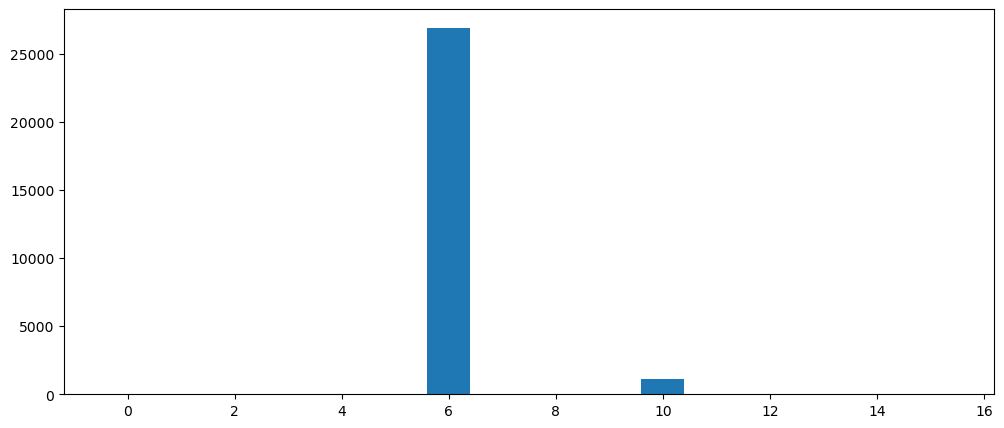

In [54]:
plt.bar(np.arange(len(nan_feats)),nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))

## Drop column 6

In [56]:
#Drop feature 6, too much NaN
print (col_names[6])
X=np.hstack((X[:,:6],X[:,7:]))


emp_length


(42538, 15)


array([   3,    3,    3,    7,    3,   32,   32,    3,    3, 1115,    0,
          0,    0,    0,    0])

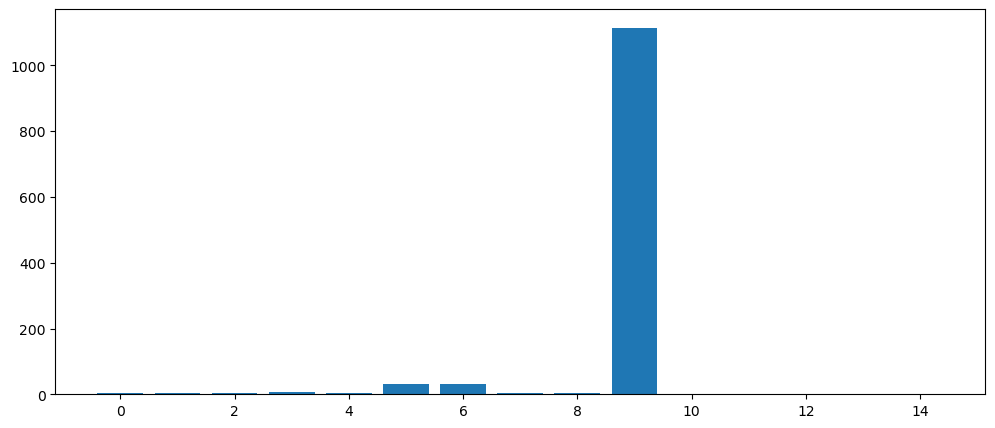

In [57]:
print(X.shape)
#Check now
nan_feats=np.sum(np.where(pd.isnull(X),1,0),axis=0)
plt.bar(np.arange(len(nan_feats)),nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_feats

## Checking rows

(array([41394,  1112,    25,     4,     0,     0,     0,     0,     0,
           3]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))


(array([4.1394e+04, 1.1120e+03, 0.0000e+00, 2.5000e+01, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00]),
 array([ 0.        ,  0.58823529,  1.17647059,  1.76470588,  2.35294118,
         2.94117647,  3.52941176,  4.11764706,  4.70588235,  5.29411765,
         5.88235294,  6.47058824,  7.05882353,  7.64705882,  8.23529412,
         8.82352941,  9.41176471, 10.        ]),
 <BarContainer object of 17 artists>)

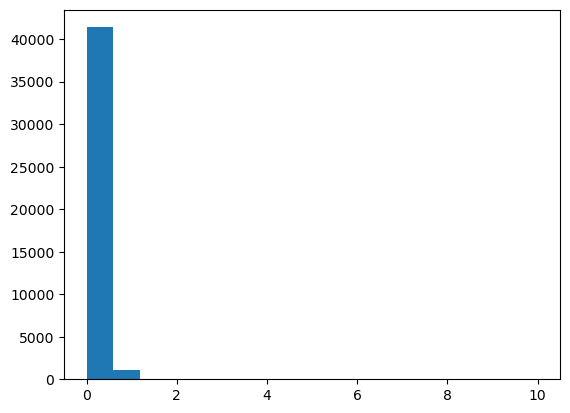

In [59]:
#Check records
nan_records=np.sum(np.where(pd.isnull(X),1,0),axis=1)
print(np.histogram(nan_records))
#plt.bar(np.arange(len(nan_records)),nan_records)
plt.hist(nan_records,bins='auto')

From the histogram, 41394 records have zero NaN,  1112 records have 1 NaN,    25 records have 2 NaNs,   and  4 have 3 NaNs 

## Dropping records with one or more NaNs

In [62]:
print (len(nan_records),len(y))
idx_rmv = np.where(nan_records>0)[0]
y = np.delete(y,idx_rmv)
X = np.delete(X,idx_rmv,axis=0)
print (y.shape,X.shape)

42538 42538
(41394,) (41394, 15)


In [63]:
print("Final X=\n",X)
pd.DataFrame(X)

Final X=
 [[ 5.0000e+03  5.0000e+03  1.6287e+02 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 [ 2.5000e+03  2.5000e+03  5.9830e+01 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 [ 2.4000e+03  2.4000e+03  8.4330e+01 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 ...
 [ 2.0000e+03  2.0000e+03  6.1870e+01 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 6.0000e+03  6.0000e+03  1.9528e+02 ... -1.0000e+00 -1.0000e+00
   1.0000e+00]
 [ 4.4000e+03  4.4000e+03  1.4125e+02 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5000.0,5000.0,162.87,24000.0,27.65,0.0,9.0,0.1065,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500.0,2500.0,59.83,30000.0,1.00,0.0,4.0,0.1527,2.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400.0,2400.0,84.33,12252.0,8.72,0.0,10.0,0.1596,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000.0,10000.0,339.31,49200.0,20.00,0.0,37.0,0.1349,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000.0,3000.0,67.79,80000.0,17.94,0.0,38.0,0.1269,2.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41389,5350.0,5350.0,180.57,4000.0,15.00,0.0,1.0,0.1312,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
41390,10000.0,10000.0,345.18,50000.0,7.22,2.0,20.0,0.1470,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
41391,2000.0,2000.0,61.87,150000.0,5.60,0.0,16.0,0.0712,1.0,7.0,1.0,-1.0,-1.0,-1.0,-1.0
41392,6000.0,6000.0,195.28,20000.0,12.90,0.0,6.0,0.1059,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0


In [64]:
print("Final y=\n",y)
pd.DataFrame(y)

Final y=
 [ 1.  1.  1. ... -1. -1. -1.]


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
41389,-1.0
41390,-1.0
41391,-1.0
41392,-1.0


## Using Pickle to save my clean data (X,y)

In [66]:
import pickle 
  
myvar = [X,y]
  
# Open a file and use dump() 
with open('../Output/dataset_complete.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(myvar, file) 

_Last updated on 9.5.25 23:18pm<br>
(C) 2025 Complex Adaptive Systems Laboratory, all rights reserved._